# Задача 1.1

### Численное нахождение корней нелинейного уравнения

### Постановка задачи
Рассмотрим полином пятой степени:

$$
P_5(x) = x^5 + a_4 x^4 + a_3 x^3 + a_2 x^2 + a_1 x + a_0,
$$

где коэффициенты заданы как:

$$
\begin{aligned}
    a_4 &= -4.556062, \\
    a_3 &= 2.93309, \\
    a_2 &= 9.274868, \\
    a_1 &= -10.32081, \\
    a_0 &= 0.422098.
\end{aligned}
$$

Требуется найти все корни уравнения $P_5(x) = 0$ с точностью $\epsilon = 10^{-8}$ методами Ньютона и простой итерации. Также необходимо сравнить скорость сходимости методов по числу итераций.

### Метод Ньютона
Метод Ньютона (метод касательных) основан на итерационной формуле:

$$
 x_{n+1} = x_n - \frac{P_5(x_n)}{P_5'(x_n)},
$$

где $P_5'(x)$ — производная полинома $P_5(x)$:

$$
 P_5'(x) = 5x^4 + 4a_4 x^3 + 3a_3 x^2 + 2a_2 x + a_1.
$$

Итерации продолжаются, пока выполняется условие $|x_{n+1} - x_n| > \epsilon$.

### Метод простой итерации
Метод простой итерации основан на преобразовании исходного уравнения к виду $x = g(x)$, где $g(x)$ — некоторая функция. В нашем случае выберем:

$$
 g(x) = x - \lambda P_5(x),
$$

где $\lambda$ — параметр, подбираемый для обеспечения сходимости.
Итерационный процесс записывается как:

$$
 x_{n+1} = g(x_n) = x_n - \lambda P_5(x_n).
$$

Метод сходится, если выполняется условие $|g'(x)| < 1$ вблизи корня.




In [ ]:
function evaluate_polynomial(x)
    return x^5 - 4.556062*x^4 + 2.93309*x^3 + 9.274868*x^2 - 10.32081*x + 0.422098
end

function evaluate_derivative(x)
    return 5*x^4 - 4*4.556062*x^3 + 3*2.93309*x^2 + 2*9.274868*x - 10.32081
end

function newton_raphson(initial_guess, tolerance=1e-8, max_iterations=100)
    current_x = initial_guess
    for iteration in 1:max_iterations
        poly_value = evaluate_polynomial(current_x)
        derivative_value = evaluate_derivative(current_x)
        if abs(derivative_value) < 1e-12
            break  # избегаем деления на ноль
        end
        next_x = current_x - poly_value / derivative_value
        if abs(next_x - current_x) < tolerance
            return next_x, iteration
        end
        current_x = next_x
    end
    return nothing, max_iterations
end

# Метод фиксированной точки
lambda_value = 0.01
function fixed_point_function(x)
    return x - lambda_value * evaluate_polynomial(x)
end

function fixed_point_iteration(initial_guess, tolerance=1e-8, max_iterations=100)
    current_x = initial_guess
    for iteration in 1:max_iterations
        next_x = fixed_point_function(current_x)
        if abs(next_x - current_x) < tolerance
            return next_x, iteration
        end
        current_x = next_x
    end
    return nothing, max_iterations
end

# Поиск корней методом Ньютона и методом фиксированной точки
initial_guesses = LinRange(-2, 3, 10)  # Локализация корней
newton_roots = []
fixed_point_roots = []

for guess in initial_guesses
    newton_root, newton_iterations = newton_raphson(guess)
    fixed_point_root, fixed_point_iterations = fixed_point_iteration(guess)
    if newton_root !== nothing
        push!(newton_roots, (newton_root, newton_iterations))
    end
    if fixed_point_root !== nothing
        push!(fixed_point_roots, (fixed_point_root, fixed_point_iterations))
    end
end

# Вывод результатов
println("Метод Ньютона:")
for (root, iterations) in newton_roots
    println("Корень: ", round(root, digits=8), ", Итерации: ", iterations)
end

println("\nМетод фиксированной точки:")
for (root, iterations) in fixed_point_roots
    println("Корень: ", round(root, digits=8), ", Итерации: ", iterations)
end

Метод Ньютона:
Корень: -1.43958492, Итерации: 6
Корень: -1.43958492, Итерации: 3
Корень: 1.82915761, Итерации: 6
Корень: 0.04254484, Итерации: 5
Корень: 0.04254484, Итерации: 5
Корень: 1.36626051, Итерации: 7
Корень: 1.36626051, Итерации: 4
Корень: 1.82915761, Итерации: 4
Корень: -1.43958492, Итерации: 18
Корень: 2.75768395, Итерации: 6

Метод фиксированной точки:
Корень: -1.43958491, Итерации: 22
Корень: -1.43958492, Итерации: 16
Корень: -1.43958491, Итерации: 25
Корень: -1.43958491, Итерации: 32
Корень: 2.757684, Итерации: 93


# Задача 1.2


## **Модификация метода ньютона на случай кратных корней :**
Пусть $\xi$ - корень кратности $m \quad (m \geq 2)$ тогда для ускорения сходимости метода Ньютона в формулу рекомендуется ввести корректирующий множитель $m$ :     
$$x_{k+1} = x_k - m\frac{f(x_k)}{f'(x_{k})}$$

Рассматриваемая функция:

$$ f(x) = 32\sqrt{2} \sin(x) + 8\pi + 16x^2 + \pi^2 - 32 - 8\pi x - 32x $$


Задача — найти корень на отрезке $$ [0.5, 1] $$

m=1: root=0.774878, iterations=4
m=2: root=0.773531, iterations=2
m=3: root=0.785296, iterations=2
m=4: root=0.797062, iterations=2
m=5: root=0.795829, iterations=4
Оценка кратности корня: m=2


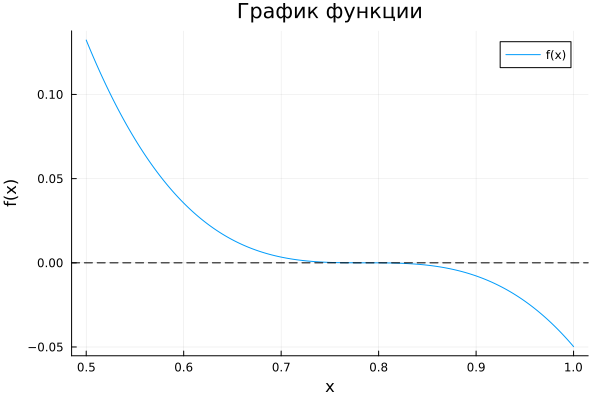

In [ ]:
using Plots

# Определение функции f(x)
f(x) = 32 * sqrt(2) * sin(x) + 8 * π + 16 * x^2 + π^2 - 32 - 8 * π * x - 32 * x

# Определение первой производной f'(x)
df(x) = 32 * sqrt(2) * cos(x) + 32 * x - 8 * π - 32

# Определение второй производной f''(x)
ddf(x) = -32 * sqrt(2) * sin(x) + 32

# Модифицированный метод Ньютона
function newton_modified(f, df, ddf, x0, m; epsilon=1e-5, max_iter=100)
    x = x0
    for i in 1:max_iter
        fx = f(x)
        dfx = df(x)
        ddfx = ddf(x)

        if abs(fx) < epsilon
            return x, i  # корень найден
        end

        if dfx == 0
            println("Производная равна нулю, метод не работает")
            return nothing, i
        end

        x_new = x - m * fx / dfx
        if abs(x_new - x) < epsilon
            return x_new, i  # корень найден
        end
        x = x_new
    end

    println("Достигнуто максимальное число итераций")
    return x, max_iter
end

# Интервал
a, b = 0.5, 1
x0 = (a + b) / 2  # начальное приближение

# Решение для разных m
results = Dict()
for m in 1:5
    root, iterations = newton_modified(f, df, ddf, x0, m)
    results[m] = (root, iterations)
    println("m=$m: root=$(round(root, digits=6)), iterations=$iterations")
end

# Определение кратности по числу итераций
m_estimated = argmin([results[m][2] for m in keys(results)])
println("Оценка кратности корня: m=$m_estimated")

# График функции
x_vals = range(a, b, length=1000)
y_vals = f.(x_vals)
plot(x_vals, y_vals, label="f(x)", xlabel="x", ylabel="f(x)", title="График функции", legend=:topright)
hline!([0], color=:black, linestyle=:dash, label="")
grid=true
display(plot!())

# Задача 1.3

Дана матрица A:
$$
A_{ij} = \begin{cases}
q_M, & i \neq j, \\
q_M + t, & i = j,
\end{cases}
$$

$$
q_M = 0.993 + (-1)^M \cdot M \cdot 10^{-4},
$$
$$
t - параметр\ принимающиЙ\ значения\ 0.0001,\ 1,\ 10000
$$
и вектор $b$:
$$
b_j = q_M^{n + 1 - j}, \quad j = 1, \dots, n
$$

Требуется решить систему $Ax=b$ методом Гаусса, затем решить повторно с функцией округления до $m$ знаков после запятой, также нужно проанализировать зависимость решения $x$ от возникающей погрешности из-за округления при всех значениях $t$.
###Метод Гаусса
Метод Гаусса - это метод вычисления решения системы линейных уравнений, который состоит из двух этапов: Приведения матрицы $A$ к верхнетреугольному виду с помощью элементарных преобразований строк и нахождения решения системы путем обратной подстановки
###Округление
Для округления была реализованна функция которая поэлементно округляет матрицу до $m$ знаков после запятой.

По итогу решается изначальная система уравнений, затем округленная. Для оценки погрешности бралась норма разности получившихся результатов.


In [ ]:
using LinearAlgebra

function gaussian_elimination(A, b)
    n = length(b)
    A = float.(A)
    b = float.(b)

    for i in 1:n
        # Поиск строки с максимальным элементом в текущем столбце
        max_row = argmax(abs.(A[i:n, i])) + i - 1
        if max_row != i
            # Обмен строк
            A[[i, max_row], :] = A[[max_row, i], :]
            b[[i, max_row]] = b[[max_row, i]]
        end

        # Обнуление элементов ниже текущего
        for j in (i + 1):n
            factor = A[j, i] / A[i, i]
            A[j, i:end] -= factor * A[i, i:end]
            b[j] -= factor * b[i]
        end
    end

    # Обратный ход
    x = zeros(n)
    for i in n:-1:1
        x[i] = (b[i] - dot(A[i, (i + 1):end], x[(i + 1):end])) / A[i, i]
    end

    return x
end

function round_numbers(matrix, m)
    return round.(matrix, digits=m)
end

# Параметры
M = 6
n = 100
m = 6
t_values = [0.0001, 1, 10000]
q_M = 0.993 + (-1)^M * M * 1e-4

for t in t_values
    A = zeros(n, n)
    b = zeros(n)

    for i in 1:n
        for j in 1:n
            if i != j
                A[i, j] = q_M^(j + 1)
            else
                A[i, j] = q_M^(j + 1) + t
            end
        end
        b[i] = q_M^(n + 1 - (i + 1))
    end

    A1 = round_numbers(A, m)
    b1 = round_numbers(b, m)

    x = gaussian_elimination(A, b)
    x1 = gaussian_elimination(A1, b1)

    error = norm(x - x1)
    println("Для t = $t, погрешность решения: $error")
end

Для t = 0.0001, погрешность решения: 0.027963807330220487
Для t = 1.0, погрешность решения: 2.7962188568886903e-6
Для t = 10000.0, погрешность решения: 2.7896333758101424e-10


# Задача 1.4

  Исследовать  зависимость числа обусловленности матрицы A от  порядка  n  матрицы.       
## ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Cоставить программу, выполняющую  LU- разложение  матрицы произвольного порядка n (схема
единственного деления).
2. Используя составленную программу, для каждого n=1,2,3,..., k  (k  - максимально возможное значение, при
котором удается решить задачу)  найти обратную матрицу  .
3. Вычислить число обусловленности матрицы по формуле \begin{equation}
    \text{cond}(A) = \|A\| \cdot \|A^{-1}\|,
\end{equation}
для каждого значения n.

где:
$\|A\|$ — норма матрицы $A$,
$\|A^{-1}\|$ — норма обратной матрицы $A^{-1}$.  
4. Построить график зависимости $ cond(A) $ от n.

В данном решении используется спектральная норма (норма Фробениуса), которая вычисляется как:
\begin{equation}
    \|A\| = \sum_{i=1}^{n} \sum_{j=1}^{n} |a_{ij}|^2.
\end{equation}

### Матрица $A$ и её элементы
Матрица $A$ строится по формуле:
\begin{equation}
    a_{ij} = \frac{123}{2c^3+5c^2},
\end{equation}
где $c$ вычисляется как:
\begin{equation}
    c = c_{ij} = 0.1 \cdot N \cdot i \cdot j.
\end{equation}

$i$ и $j$ — индексы строки и столбца матрицы $A$, начиная с 1 до n .

## Теория к задаче

### LU разложение
LU-разложение квадратной матрицы с использованием схемы единственного деления и частичного выбора главного элемента. Разложение выполняется с разбиением исходной матрицы $A$ на произведение:
$$
PA=LU
$$
где $P$ - матрица перестановок, которая отражает перестановки строк.
Создаются три матрицы:
$L$ — единичная матрица,
$U$ — копия исходной матрицы $A$,
$P$ — единичная матрица перестановок.
В каждом столбце выбирается главный элемент — максимальный по модулю среди оставшихся элементов.Если главный элемент находится не в текущей строке, выполняется перестановка строк в матрицах $U$ и $P$. Аналогично переставляются уже вычисленные элементы в $L$, если итерация не первая.
Для всех строк, находящихся ниже текущей, вычисляется множитель, который заносится в соответствующий элемент матрицы $L$:
$$
L [{ j } ,{ i } ] = \frac { U [ { j } , { i } ]} { U [ { i } , { i } ] }
$$
Затем из строки $j$ матрицы $U$ вычитается текущая строка $i$, умноженная на этот коэффициент. Это позволяет занулить элементы ниже главной диагонали.
###Обратная матрица
Чтобы найти $A^{-1}$ нужно решить систему:
$$
AA^{-1}=E
$$
Это сводится к последовательному решению двух систем:
$LY=P$  и $UX=Y$, где $Y$ - промежуточная вспомогательная матрица, а $X$ и будет искомой обратной матрицей для $A$.
###Число обусловленности.
Число обусловленности матрицы $A$ показывает, насколько точно можно решить систему линейных уравнений с данной матрицей. Оно определяется как:
$$
\operatorname{cond}(A) = \|A\| \cdot \|A^{-1}\|
$$
Результаты показывают, как изменяется обусловленность при увеличении размерности матрицы. Высокое значение
cond($A$) указывает на плохо обусловленную матрицу, при которой небольшие изменения в данных могут привести к большим ошибкам в решении.

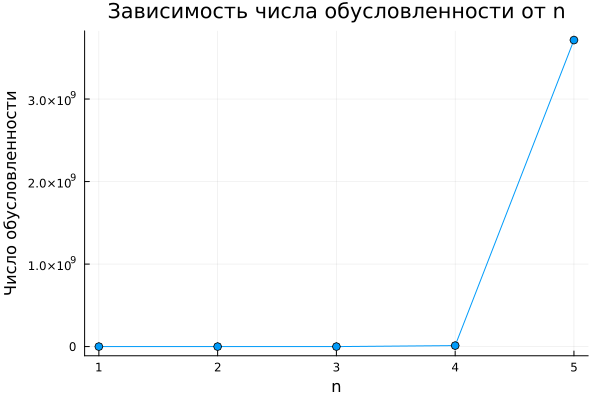

In [ ]:
# LU-разложение с выбором ведущего элемента
function lu_decomposition(A)
    n = size(A, 1)
    L = Matrix{Float64}(I, n, n)
    U = copy(A)
    P = Matrix{Float64}(I, n, n)

    for i in 1:n
        pivot = argmax(abs.(U[i:n, i])) + i - 1
        if pivot != i
            U[[i, pivot], :] = U[[pivot, i], :]
            P[[i, pivot], :] = P[[pivot, i], :]
            if i > 1
                L[[i, pivot], 1:i-1] = L[[pivot, i], 1:i-1]
            end
        end
        for j in i+1:n
            L[j, i] = U[j, i] / U[i, i]
            U[j, :] -= L[j, i] * U[i, :]
        end
    end
    return L, U, P
end

# Нахождение обратной матрицы через LU-разложение
function inverse_via_lu(A)
    L, U, P = lu_decomposition(A)
    Y = L \ P
    A_inv = U \ Y
    return A_inv
end

# Вычисление числа обусловленности
function cond(A)
    return norm(A) * norm(inverse_via_lu(A))
end

# Основной код
n_val = 1:5
cond_val = Float64[]
N = 16

for n in n_val
    A = [123 / (2 * (0.1 * N * i * j)^3 + 5 * (0.1 * N * i * j)^2) for i in 1:n, j in 1:n]
    push!(cond_val, cond(A))
end

# Построение графика
plot(n_val, cond_val, marker=:o, xlabel="n", ylabel="Число обусловленности", title="Зависимость числа обусловленности от n", legend=false)
grid=true
display(plot!())

# Задача 1.5

Рассматривается система уравнений $A z(x) = b(x)$ порядка $n = 30$, где:

• Матрица $A$ определяется следующим образом:
  
  $$
  A_{ij} =
  \begin{cases}
    q_M^{i+j} + 0.1 ⋅ (j - i),  i ≠ j, \\
  (q_M - 1)^{i+j},  i = j,
  \end{cases}
  $$
  при этом $q_M = 1.001 - 2 \cdot M \cdot 10^{-3}$, $M = 6$.

• Вектор $b(x)$ формируется по следующему принципу:
  $$
  b_i(x) = xe^{\frac{x}{i}}cos\left(\frac{x}{i}\right), \quad i = 1, \ldots, n.
  $$


Решение системы уравнений $A z(x) = b(x)$:

Используем метод Гаусса с полным выбором для решения системы уравнений и нахождения вектора $z(x)$.

Построение графика функции $y(x)$:

Функция $y(x)$ определяется как сумма компонент вектора $z(x)$:
$$
y(x) = \sum_{i=1}^{n} z_i(x).
$$

Построим график $y(x)$ на отрезке $[-5,5]$.

## Решение системы линейных уравнений методом Гаусса с полным выбором

Метод Гаусса — это численный метод для решения системы линейных уравнений $$ A \cdot x = b $$, где $A$ — матрица коэффициентов, $x$ — вектор переменных, а $b$ — вектор правых частей.

Метод Гаусса с полным выбором предполагает, что на каждом шаге выбор максимального элемента не только по столбцу, но и по строке. Это позволяет минимизировать ошибки округления и повысить устойчивость метода.

## Алгоритм метода Гаусса с полным выбором

1. На каждом шаге ищем максимальный элемент по модулю среди всех элементов под главной диагональю в текущем столбце. Для этого сравниваем все элементы в оставшихся строках и столбцах.
2. Строка с максимальным элементом меняется местами с текущей строкой.
3. Используем элемент на диагонали для обнуления всех элементов ниже его в текущем столбце.
4. Повторяем шаги для всех столбцов, пока система не станет верхнетреугольной.
5. Решаем полученную систему с помощью подстановки назад.




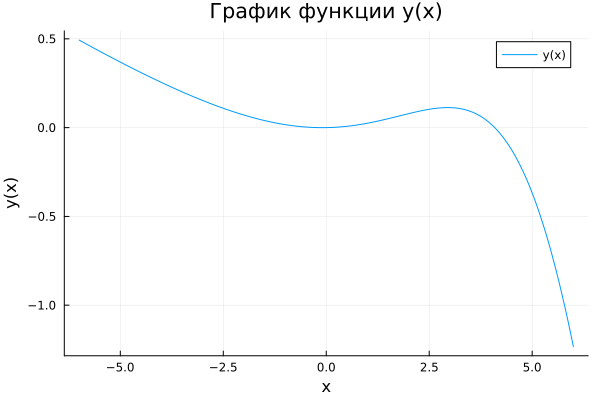

In [ ]:
# Параметры задачи
M = 6
matrix_size = 100
x_range = (-6, 6)
num_points = 400

# Генерация матрицы A
function generate_matrix(parameter_M, size)
    q_M = 1.001 - 2 * parameter_M * 1e-3
    matrix = zeros(size, size)
    for i in 1:size
        for j in 1:size
            if i != j
                matrix[i, j] = q_M^(i + j) + 0.1 * (j - i)
            else
                matrix[i, j] = (q_M - 1)^(i + j)
            end
        end
    end
    return matrix
end

# Генерация вектора b
function generate_vector(x, size)
    vector = zeros(size)
    for i in 1:size
        vector[i] = x * exp(x / (i + 1)) * cos(x / (i + 1))
    end
    return vector
end

function solve_system(A, b)
    n = length(b)
    A = float.(A)
    b = float.(b)

    # Массив для отслеживания перестановок столбцов
    col_perm = collect(1:n)

    for col in 1:n
        # Полный выбор ведущего элемента
        max_val, max_idx = findmax(abs.(A[col:end, col:end]))
        max_row, max_col = Tuple(max_idx) .+ (col - 1, col - 1)

        # Перестановка строк
        if max_row != col
            A[[col, max_row], :] = A[[max_row, col], :]
            b[[col, max_row]] = b[[max_row, col]]
        end

        # Перестановка столбцов
        if max_col != col
            A[:, [col, max_col]] = A[:, [max_col, col]]
            col_perm[[col, max_col]] = col_perm[[max_col, col]]
        end

        # Нормализация текущей строки
        pivot = A[col, col]
        if pivot == 0
            error("Матрица вырождена.")
        end
        A[col, col:end] /= pivot
        b[col] /= pivot

        # Исключение переменной из остальных строк
        for row in col+1:n
            factor = A[row, col]
            A[row, col:end] -= factor * A[col, col:end]
            b[row] -= factor * b[col]
        end
    end

    # Обратный ход
    x = zeros(n)
    for row in n:-1:1
        x[row] = b[row] - dot(A[row, row+1:end], x[row+1:end])
    end

    # Обратная перенумерация столбцов
    x[col_perm] = x  # Возвращаем переменные в исходный порядок

    return x
end

# Основной код
x_values = range(x_range[1], x_range[2], length=num_points)
y_values = []

for x in x_values
    matrix_A = generate_matrix(M, matrix_size)
    vector_b = generate_vector(x, matrix_size)
    solution = solve_system(matrix_A, vector_b)
    push!(y_values, sum(solution))
end

# Построение графика
plot(x_values, y_values, label="y(x)", xlabel="x", ylabel="y(x)", title="График функции y(x)", legend=:topright)
grid=true
display(plot!())

# ЗАдача 1.7

## Метод Зейделя для решения системы линейных уравнений

Метод Зейделя — это итерационный метод решения системы линейных уравнений:  $ A x = b $

- $ A $ — матрица коэффициентов,  
- $ x $ — вектор неизвестных,  
- $ b $ — вектор правых частей.
---

### Разбиение матрицы  
Матрицу $ A $ представляют в виде суммы:  $ A = A_1 + A_2 + D $

- $ D $ — диагональная часть матрицы $ A $  
- $ A_1 $ — нижнетреугольная часть (без диагонали),  
- $ A_2 $ — верхнетреугольная часть (без диагонали).
---

### Итерационный процесс  
Метод Зейделя строит последовательность приближений:  $ x^{(n+1)} = (I - B_1)^{-1} (B_2 x^{(n)} + c) $

- $ B_1 = D^{-1} A_1 $  
- $ B_2 = D^{-1} A_2 $  
- $ c = D^{-1} b $
---

### Условие сходимости  
Для сходимости метода необходимо, чтобы спектральный радиус матрицы:  $ B = B_1 + B_2 $ удовлетворял условию  $ \|B\| < 1 $  

Если это условие выполняется, итерации сходятся к решению системы.

---

### Оценка ошибки  
Погрешность на каждой итерации оценивается как:  

$$ \|x^{(n+1)} - x\| \leq \frac{\|B_2\|}{1 - \|B\|} \cdot \|x^{(n)} - x^{(n+1)}\| $$

Этот критерий позволяет контролировать точность вычислений на каждом шаге.  


In [ ]:
using LinearAlgebra

# Метод Зейделя
function z_method(A, b, x0, max_iter)
    n = length(b)
    D = Diagonal(diag(A))  # Диагональная часть матрицы A
    L = LowerTriangular(A) - D  # Нижняя треугольная часть (без диагонали)
    U = UpperTriangular(A) - D  # Верхняя треугольная часть (без диагонали)

    D_inv = inv(D)  # Обратная диагональная матрица
    B_L = -D_inv * L  # Матрица B_L
    B_H = -D_inv * U  # Матрица B_H
    c = D_inv * b  # Вектор c
    I_matrix = Matrix{Float64}(I, n, n)  # Единичная матрица
    x = copy(x0)  # Начальное приближение
    inv_matr = inv(I_matrix - B_L)  # Обратная матрица (I - B_L)

    for _ in 1:max_iter
        x_new = inv_matr * (B_H * x + c)  # Итерация метода Зейделя
        x = x_new
    end

    return x
end

# Проверка условия сходимости
function convergence_condition(A)
    D = Diagonal(diag(A))  # Диагональная часть матрицы A
    L = LowerTriangular(A) - D  # Нижняя треугольная часть (без диагонали)
    U = UpperTriangular(A) - D  # Верхняя треугольная часть (без диагонали)

    D_inv = inv(D)  # Обратная диагональная матрица
    B_L = D_inv * L  # Матрица B_L
    B_H = D_inv * U  # Матрица B_H
    B = B_L + B_H  # Матрица B = B_L + B_H

    return norm(B, Inf)  # Норма матрицы B
end

# Метод Зейделя с заданной точностью
function z_method_with_tolerance(A, b, x0, epsilon)
    n = length(b)
    D = Diagonal(diag(A))  # Диагональная часть матрицы A
    L = LowerTriangular(A) - D  # Нижняя треугольная часть (без диагонали)
    U = UpperTriangular(A) - D  # Верхняя треугольная часть (без диагонали)

    D_inv = inv(D)  # Обратная диагональная матрица
    B_L = -D_inv * L  # Матрица B_L
    B_H = -D_inv * U  # Матрица B_H
    B = B_L + B_H  # Матрица B = B_L + B_H
    c = D_inv * b  # Вектор c
    I_matrix = Matrix{Float64}(I, n, n)  # Единичная матрица
    x = copy(x0)  # Начальное приближение
    inv_matr = inv(I_matrix - B_L)  # Обратная матрица (I - B_L)
    q = (1 - norm(B, Inf)) / norm(B_H, Inf)  # Параметр q
    iterations = 0  # Счетчик итераций

    while true
        x_new = inv_matr * (B_H * x + c)  # Итерация метода Зейделя
        iterations += 1
        if norm(x_new - x) < q * epsilon  # Проверка условия остановки
            break
        end
        x = x_new
    end

    return x, iterations
end

# Матрица A и вектор b
A = [89.1  29.0   0.0  59.4   0.0;
     39.6 -84.0   0.0 -39.6   4.0;
    -29.7  31.0  86.0  19.8   3.0;
     49.5  39.0   8.0 -99.0   0.0;
    -59.4   0.0  24.0  13.2  98.0]

b = [200.5, -64.4, -95.1, -40.7, 12.6]

# Решение методом Гаусса
x_solution_gauss = solve_system(A, b)
println("Гаусс - ", x_solution_gauss)

# Начальное приближение
initial_guess = zeros(5)

# Проверка условия сходимости
println("Условие сходимости: ", convergence_condition(A))

# Решение методом Зейделя после 10 итераций
x_z_10 = z_method(A, b, initial_guess, 10)
println("Зейдель после 10 итераций - ", x_z_10)

# Вычисление абсолютной ошибки
abs_error = norm(x_z_10 - x_solution_gauss)
println("Ошибка после 10 итераций: ", abs_error)

# Решение методом Зейделя с заданной точностью
epsilon = 1e-6
x_eps, iterations = z_method_with_tolerance(A, b, initial_guess, epsilon)
println("Зейдель после $iterations итераций - ", x_eps)

# Вычисление абсолютной ошибки
abs_error = norm(x_eps - x_solution_gauss)
println("Ошибка после $iterations итераций: ", abs_error)

Гаусс - [1.1818181818181817, 0.8, -1.3, 1.2121212121212122, 0.9999999999999998]
Условие сходимости: 0.6666666666666667
Зейдель после 10 итераций - [0.80777505779676, 0.456731392578987, -1.3973473421495999, 0.8820061710537708, 0.8415887059878383]
Ошибка после 10 итераций: 0.6334731082702907
Зейдель после 134 итераций - [1.1818183303398102, 0.8000001363019642, -1.2999999613462063, 1.2121213432002784, 1.0000000629005101]
Ошибка после 134 итераций: 2.5153371775386384e-7


# Задача 1.8

## Теория и решение задачи

### Постановка задачи

Дана система линейных уравнений:

$$
A x = b,
$$

где:
- $A$ — симметричная положительно определённая матрица размерности $n \times n$,
- $b$ — вектор правых частей,
- $x$ — вектор неизвестных.

#### Формулы для матриц и вектора:

1. **Элементы матрицы $A$**:

   $$
   a_{ij} =
   \begin{cases}
   2\tau + (q^i + q^j) \cdot t_m, & i \neq j, \\
   2 \cdot q^i \cdot t_m^2, & i = j,
   \end{cases}
   $$

   где:
   - $q^i = (q_m)^i$,
   - $q_m = 1.05 + (-1)^m \cdot m \cdot 10^{-2}$,
   - $\tau = \sum_{i=1}^n q^{2i}$,
   - $t_m = (m + n)$.

2. **Матрица $B$**:
   - $B$ — двухдиагональная матрица, где элементы на главной диагонали и поддиагонали равны соответствующим элементам матрицы $A$.

3. **Элементы вектора $b$**:

   $$
   b_i = \tau + 3(q_m)^i, \quad i = 1, \dots, n.
   $$

---
### Методы решения

#### 1. **Явный метод с постоянным параметром $\tau$**

Итерационный процесс для явного метода задаётся формулой:

$$
x^{k+1} = x^k + \tau B^{-1} (b - A x^k),
$$

где:
- $\tau$ — постоянный параметр,
- $B$ — матрица, используемая для предобуславливания (в данном случае — двухдиагональная часть матрицы $A$).

**Особенности**:
- Параметр $\tau$ должен быть выбран таким образом, чтобы обеспечить сходимость метода. В данном решении $\tau$ выбирается как обратное значение максимального собственного значения матрицы $A$:

$$
\tau = \frac{1}{\lambda_{\text{max}}}.
$$

---

#### 2. **Неявный метод с чебышевским набором параметров**

Итерационный процесс для неявного метода задаётся формулой:

$$
x^{k+1} = x^k + \tau_k B^{-1} (b - A x^k),
$$

где:
- $\tau_k$ — чебышевский параметр, вычисляемый на каждой итерации,
- $B$ — двухдиагональная матрица.

**Чебышевские параметры**:
Чебышевские параметры $\tau_k$ вычисляются по формуле:

$$
\tau_k = \frac{2}{\lambda_{\text{max}} + \lambda_{\text{min}} + (\lambda_{\text{max}} - \lambda_{\text{min}}) \cos\left(\frac{(2k - 1)\pi}{2N}\right)},
$$

где:
- $\lambda_{\text{min}}$ и $\lambda_{\text{max}}$ — минимальное и максимальное собственные значения матрицы $A$,
- $N$ — общее число итераций.

In [ ]:
using LinearAlgebra

# Генерация матрицы A
function generate_matrix(n, m)
    qm = 1.05 + (-1)^m * m * 1e-2
    tm = m + n
    tau = sum([qm^(2*i) for i in 1:n])

    A = zeros(n, n)
    for i in 1:n
        for j in 1:n
            if i == j
                A[i, j] = 2 * qm^(i+1) * tm^2
            else
                A[i, j] = 2 * tau + (qm^(i+1) + qm^(j+1)) * tm
            end
        end
    end
    return A
end

# Генерация вектора b
function generate_vector(n, m)
    qm = 1.05 + (-1)^m * m * 1e-2
    tau = sum([qm^(2*i) for i in 1:n])

    b = zeros(n)
    for i in 1:n
        b[i] = tau + 3 * qm^(i+1)
    end
    return b
end

# Метод прогонки для трехдиагональной матрицы
function tridiagonal_algorithm_3diag(A, b)
    n = length(b)
    a = zeros(n-1)  # Первая поддиагональ
    b_vec = zeros(n)  # Главная диагональ
    c = zeros(n-1)  # Первая наддиагональ

    # Заполнение массивов
    for i in 1:n
        b_vec[i] = A[i, i]  # Главная диагональ
        if i > 1
            a[i-1] = A[i, i-1]  # Первая поддиагональ
        end
        if i < n
            c[i] = A[i, i+1]  # Первая наддиагональ
        end
    end

    # Прямой ход (переход к верхнетреугольному виду)
    for i in 2:n
        factor = a[i-1] / b_vec[i-1]
        b_vec[i] -= factor * c[i-1]
        b[i] -= factor * b[i-1]
    end

    # Обратный ход
    x = zeros(n)
    x[n] = b[n] / b_vec[n]  # Начинаем с последнего элемента

    for i in n-1:-1:1
        x[i] = (b[i] - c[i] * x[i+1]) / b_vec[i]
    end

    return x
end

# Явный метод с постоянным параметром
function explicit_method(A, B, b, x0, epsilon, max_iter)
    n = length(b)
    x = copy(x0)
    iterations = 0

    eigenvalues = eigvals(A)
    lambda_max = maximum(eigenvalues)
    tau = 1 / lambda_max

    for _ in 1:max_iter
        r = b - A * x
        iterations += 1
        if norm(r) < epsilon
            break
        end

        y = tridiagonal_algorithm_3diag(B, r)
        x = x + tau * y
    end

    return x, iterations
end

# Неявный метод с чебышевским набором параметров
function chebyshev_method(A, B, b, x0, epsilon, max_iter)
    x = copy(x0)
    iterations = 0
    eigenvalues = eigvals(A)
    lambda_min = minimum(eigenvalues)
    lambda_max = maximum(eigenvalues)

    for k in 1:max_iter
        r = b - A * x
        iterations += 1
        if norm(r) < epsilon
            break
        end

        tau_k = 2 / (lambda_max + lambda_min + (lambda_max - lambda_min) * cos((2 * k - 1) * π / (2 * max_iter)))

        y = tridiagonal_algorithm_3diag(B, r)
        x = x + tau_k * y
    end

    return x, iterations
end

# Основной код
m = 45
n = 1
A = generate_matrix(n, m)
b = generate_vector(n, m)
x0 = zeros(n)
B = diagm(0 => diag(A))  # Главная диагональ
B += diagm(1 => diag(A, 1))  # Первая наддиагональ
B += diagm(-1 => diag(A, -1)) # Первая поддиагонал

epsilon = 1e-6
max_iterations = Int(1e6)

println("Явный метод")
x_const, iter_const = explicit_method(A, B, b, x0, epsilon, max_iterations)
println("Ошибка: ", norm(A * x_const - b))
println("Итерации: ", iter_const)

println("Неявный метод")
x_cheb, iter_cheb = chebyshev_method(A, B, b, x0, epsilon, max_iterations)
println("Ошибка: ", norm(A * x_cheb - b))
println("Итерации: ", iter_cheb)

Явный метод
Ошибка: 9.997747307810556e-7
Итерации: 21598
Неявный метод
Ошибка: 9.997747307810556e-7
Итерации: 21598


# Задача 1.9

## Теория и решение задачи

### Постановка задачи

Дана система нелинейных уравнений:

$$
F(x) = 0,
$$

где:
- $F(x) = [f_1(x), f_2(x)]^T$ — вектор-функция,
- $x = [x_1, x_2]^T$ — вектор неизвестных.

Конкретно для задачи функции заданы как:

$$
f_1(x_1, x_2) = x_1 x_2 + 0.3 x_1 - 0.1,
$$
$$
f_2(x_1, x_2) = 5 x_2 + \cos x_1 - 1.
$$

Требуется найти корень системы с точностью $\varepsilon = 10^{-6}$ с использованием метода простой итерации.

---

### Метод простой итерации

Метод простой итерации (или метод фиксированной точки) заключается в преобразовании системы $F(x) = 0$ к виду:

$$
x = \Phi(x),
$$

где $\Phi(x)$ — некоторая вектор-функция. Итерационный процесс задаётся формулой:

$$
x^{(k+1)} = \Phi(x^{(k)}),
$$

где $k$ — номер итерации.

#### Преобразование системы

Для применения метода простой итерации к системе $F(x) = 0$, её необходимо привести к виду $x = \Phi(x)$. Это можно сделать, умножив исходную систему на неособенную матрицу $A$ и прибавив к обеим частям уравнения вектор неизвестных $x$:

$$
x = x - A F(x).
$$

Таким образом, вектор-функция $\Phi(x)$ принимает вид:

$$
\Phi(x) = x - A F(x).
$$

#### Условие сходимости

Для сходимости метода простой итерации необходимо, чтобы вектор-функция $\Phi(x)$ была сжимающей. Это можно проверить с помощью нормы матрицы Якоби $G$ для $\Phi(x)$, где:

$$
G = \begin{pmatrix}
\frac{\partial \phi_1}{\partial x_1} & \frac{\partial \phi_1}{\partial x_2} \\
\frac{\partial \phi_2}{\partial x_1} & \frac{\partial \phi_2}{\partial x_2}
\end{pmatrix}.
$$

Если норма матрицы $G$ (в данном случае $||\cdot||_{\infty}$) меньше 1, то метод сходится.

---

### Якобиан для $\Phi(x)$

Для функции $\Phi(x) = x - A F(x)$, якобиан $G(x)$ вычисляется как:

$$
G(x) = I - A J_F(x),
$$

где:
- $I$ — единичная матрица,
- $J_F(x)$ — якобиан для $F(x)$.

#### Якобиан для $F(x)$

Якобиан $J_F(x)$ для $F(x)$ вычисляется как:

$$
J_F(x) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{pmatrix}.
$$

### Проверка условия сходимости

Для проверки сходимости метода необходимо вычислить норму матрицы $G$ (в норме $||\cdot||_{\infty}$) и убедиться, что она меньше 1 на множестве, где мы ищем численное решение:

$$
||G(x)||_{\infty} < 1 \quad \forall x \in M.
$$


In [ ]:
function F(x)
    x1, x2 = x
    return [x1 * x2 + 0.3 * x1 - 0.1, 5 * x2 + cos(x1) - 1]
end

# Якобиан для F(x)
function Jacobian_F(x1, x2)
    return [x2 + 0.3 x1;
            -sin(x1) 5.0]
end

# Проверка условия сходимости
function check_convergence(a, b, A)
    max_norm = 0.0
    for x1 in range(a, b, length=100)
        for x2 in range(a, b, length=100)
            G = I - A * Jacobian_F([x1,x2])
            norm_G = norm(G, Inf)
            if max_norm < norm_G
                max_norm = norm_G
            end
        end
    end
    return max_norm
end


# Метод простой итерации
function simple_iteration(A, x0, epsilon, max_iterations)
    x = copy(x0)
    iterations = 0

    for k in 1:max_iterations
        x_new = x - A * F(x)

        # Проверка на сходимость
        if norm(x_new - x) < epsilon
            break
        end

        x = x_new
        iterations += 1
    end

    return x, iterations
end

x0 = [0.0, 0.0]
a,b = [0.0, 0.5]

# Матрица A
A = [0.2 0.0; 0.0 0.2]
# Параметры метода
epsilon = 1e-6
max_iterations = 1000

println(check_convergence(a, b, A))


# Решение системы
x, iterations = simple_iteration(A, x0, epsilon, max_iterations)

println("Решение", x)
println("error: ", F(x))
println("Количество итераций: ", iterations)

0.94
Решение[0.322258094574336, 0.010295399407053861]
error: [-4.795831900286651e-6, -3.253928804181072e-7]
Количество итераций: 147
